In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


Problème : Prédiction du prix d'une maison

Supposons que vous ayez un ensemble de données sur les prix des maisons en fonction de leur superficie. Voici quelques données fictives pour illustrer le problème :

In [2]:
df = pd.read_csv('data/mini_dataset_prix_maison.csv')

In [3]:
df

,Superficie,Prix
0,70,300
1,85,400
2,100,450
3,120,500
4,150,600


# Tâche :

Utilisez la méthode des moindres carrés pour trouver l'équation de la droite de régression linéaire qui modélise la relation entre la superficie et le prix.
Une fois que vous avez l'équation de la droite de régression, utilisez-la pour prédire le prix d'une maison ayant une superficie de 110 m².

x : Superficie

---


y : Prix

---


moyenne(x) = (1/5)*(70+85+100+120+150) = 105

---


moyenne(y) = (1/5)*(300+400+450+500+600) = 450

---


covariance(x,y) = (1/5)*((70-105)*(300-450)+(85-105)*(400-450)+(100-105)*(450-450)+(120-105)*(500-450)+(150-105)*(600-450)) = 2750

---


variance(x) = (1/5)*(((70-105)²)+((85-105)²)+((100-105)²)+((120-105)²)+((150-105)²)) = 780

---


variance(y) = (1/5)*((300-450)²+(400-450)²+(450-450)²+(500-450)²+(600-450)²) = 10000

---


taux de correlation = 2750/√(780+10000) = 0.9846579518042202

---


On a une forte corrélation de 0.98 proche de 1, cela signifique que nous avons des données linéaire c'est a dire que notre nuage de point formera une droite et que plus la superficie(x) sera élevé plus le prix(x) augmentera.

---


m = 2750/780 = 3.5256410256410255

---


b = 450-(2750/780)*105 = 79.80769230769232

---


y = (2750/780)x+(450-(2750/780)*105)


In [4]:
def calculer_la_prediction(data,name_feature,a,b):
  x = data[name_feature]
  data['Prédiction'] = a * x + b
  y = pd.DataFrame(data['Prédiction'])
  return y

In [5]:
a = 2750/780
b = 450-(2750/780)*105
prediction_y = calculer_la_prediction(data=df,name_feature='Superficie',a=a,b=b)

In [6]:
prediction_y

,Prédiction
0,326.602564
1,379.487179
2,432.371795
3,502.884615
4,608.653846


In [7]:
def calculer_la_mse(a,b,data,name_feature,name_target):
  mse = 0
  m = len(data)
  for i in range(len(data)):
    x = data[name_feature][i]
    y = data[name_target][i]
    mse += (a*x+b - y)**2
  mse = 1/m*2*mse
  return mse


In [8]:
mse = calculer_la_mse(a=a,b=b,data=df,name_feature='Superficie',name_target='Prix')

In [9]:
mse

608.9743589743589

In [10]:
rmse = math.sqrt(mse)

In [11]:
rmse

24.677405839641228

In [12]:
def afficher_le_modele(data, name_feature, name_target, a, b):
    x = data[name_feature]
    y = data[name_target]
    intervalle_x = range(int(x.min()), int(x.max()) + 1)
    predictions = [a * val_x + b for val_x in intervalle_x]

    plt.scatter(x, y, c='black', label=f"étude de target {name_target} en fonction de la feature {name_feature}")
    plt.plot(intervalle_x, predictions, c='red', label="Modèle")

    plt.xlabel(name_feature)
    plt.ylabel(name_target)
    plt.legend()
    plt.show()

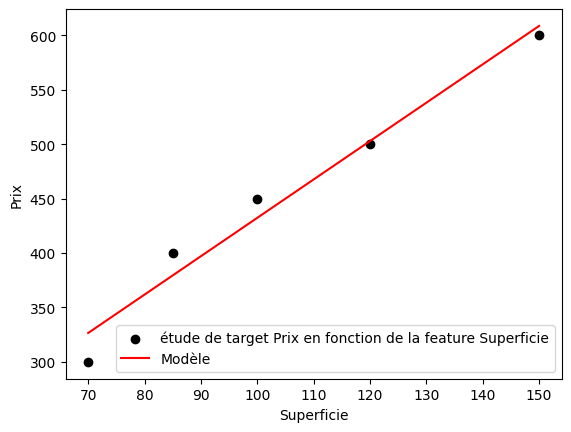

In [13]:
afficher_le_modele(data=df,name_feature='Superficie',name_target='Prix',a=a,b=b)

In [14]:
f'Le prix d\'une maison ayant une superficie de 110m² est environ de {(2750/780) * 110 +(450-(2750/780) * 105)} € . '

"Le prix d'une maison ayant une superficie de 110m² est environ de 467.62820512820514 € . "

Maintenant, je vais entreprendre une régression linéaire en utilisant une méthode classique en science des données, à savoir la descente de gradient.

In [15]:
df_sncf = pd.read_csv(filepath_or_buffer='data/emission-co2-tgv.csv',sep=';')

In [16]:
df_sncf

,Type de trajet,Origine,Origine_uic,Destination,Destination_uic,Liaison,Distance (km),TGV (1 pers.) - Empreinte CO2e (kgCO2e/voyageur),TGV (3 pers.) - Empreinte CO2e (kgCO2e/voyageur),Voiture (autosolisme 1 pers.) - Empreinte CO2e (kgCO2e/voyageur),Voiture (covoiturage 3 pers.) - Empreinte CO2e (kgCO2e/voyageur)
0,Province/Province,Bordeaux Saint-Jean,87581009,Champagne-Ardenne TGV,87171926,Bordeaux Saint-Jean - Champagne-Ardenne TGV,700.061,1.897165,5.691496,135.111773,45.037258
1,Province/Province,Bordeaux Saint-Jean,87581009,Lorraine TGV,87142109,Bordeaux Saint-Jean - Lorraine TGV,867.618,2.351245,7.053734,167.450274,55.816758
2,Province/Province,Nantes,87481002,Brest,87474007,Nantes - Brest,593.333,1.607932,4.823797,76.912623,25.637541
3,Province/Province,Nantes,87481002,Toulouse Matabiau,87611004,Nantes - Toulouse Matabiau,782.081,2.119440,6.358319,150.941633,50.313878
4,Paris/Province,Paris Gare de Lyon,87686006,Avignon TGV,87318964,Paris Gare de Lyon - Avignon TGV,661.020,1.791364,5.374093,127.576860,42.525620
...,...,...,...,...,...,...,...,...,...,...,...
106,Paris/Province,Paris Gare de Lyon,87686006,Nice,87756056,Paris Gare de Lyon - Nice,971.680,2.633253,7.899758,187.534240,62.511413
107,Paris/Province,Paris Montparnasse,87391003,Saint-Malo,87478107,Paris Montparnasse - Saint-Malo,444.830,1.205489,3.616468,85.852190,28.617397
108,Paris/Province,Paris Gare de Lyon,87686006,Valence TGV Rhône-Alpes Sud,87763029,Paris Gare de Lyon - Valence TGV Rhône-Alpes Sud,527.124,1.428506,4.285518,101.734932,33.911644
109,Province/Province,Strasbourg,87212027,Marne-la-Vallée Chessy,87111849,Strasbourg - Marne-la-Vallée Chessy,428.817,1.162094,3.486282,82.761681,27.587227


In [17]:
df_sncf = df_sncf[['Distance (km)','TGV (1 pers.) - Empreinte CO2e (kgCO2e/voyageur)']]

In [18]:
df_sncf.corr() #En considérant la corrélation, ce jeu de données semble être idéal pour effectuer une régression linéaire.

,Distance (km),TGV (1 pers.) - Empreinte CO2e (kgCO2e/voyageur)
Distance (km),1.0,1.0
TGV (1 pers.) - Empreinte CO2e (kgCO2e/voyageur),1.0,1.0


In [19]:
df_sncf.head()

,Distance (km),TGV (1 pers.) - Empreinte CO2e (kgCO2e/voyageur)
0,700.061,1.897165
1,867.618,2.351245
2,593.333,1.607932
3,782.081,2.119440
4,661.020,1.791364


In [20]:
df_sncf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 2 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Distance (km)                                     111 non-null    float64
 1   TGV (1 pers.) - Empreinte CO2e (kgCO2e/voyageur)  111 non-null    float64
dtypes: float64(2)
memory usage: 1.9 KB


In [21]:
df_sncf.describe()

,Distance (km),TGV (1 pers.) - Empreinte CO2e (kgCO2e/voyageur)
count,111.000000,111.000000
mean,562.540045,1.524484
std,231.259746,0.626714
min,146.156000,0.396083
25%,398.783500,1.080703
50%,531.951000,1.441587
75%,732.779000,1.985831
max,1349.358000,3.656760


In [22]:
# Shuffle the DataFrame
df_sncf_shuffled = shuffle(df_sncf, random_state=200)

# Split the shuffled DataFrame into train and test
train = df_sncf_shuffled.sample(frac=0.8, random_state=200)
test = df_sncf_shuffled.drop(train.index)

# Reset the indices for both train and test DataFrames
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)


In [23]:
train

,Distance (km),TGV (1 pers.) - Empreinte CO2e (kgCO2e/voyageur)
0,314.090,0.851184
1,1105.927,2.997062
2,593.333,1.607932
3,283.752,0.768968
4,290.806,0.788084
...,...,...
84,609.253,1.651076
85,595.333,1.613352
86,525.960,1.425352
87,867.618,2.351245


In [24]:
test

,Distance (km),TGV (1 pers.) - Empreinte CO2e (kgCO2e/voyageur)
0,496.010,1.344187
1,584.182,1.583133
2,429.496,1.163934
3,537.130,1.455622
4,469.429,1.272153
5,560.633,1.519315
6,694.440,1.881932
7,489.554,1.326691
8,803.684,2.177984
9,201.678,0.546547


In [25]:
def initialiser_les_parametres():
  a = 0
  b = 0
  return a,b

In [26]:
def calculer_la_prediction(data,name_feature,a,b):
  x = data[name_feature]
  data['Prédiction'] = a * x + b
  y = pd.DataFrame(data['Prédiction'])
  return y

In [27]:
def afficher_le_modele(data, name_feature, name_target, a, b):
    x = data[name_feature]
    y = data[name_target]
    intervalle_x = range(int(x.min()), int(x.max()) + 1)
    predictions = [a * val_x + b for val_x in intervalle_x]

    plt.scatter(x, y, c='black', label=f"étude de target {name_target} en fonction de la feature {name_feature}")
    plt.plot(intervalle_x, predictions, c='red', label="Modèle")

    plt.xlabel(name_feature)
    plt.ylabel(name_target)
    plt.legend()
    plt.show()


In [28]:
def calculer_la_mse(a,b,data,name_feature,name_target):
  mse = 0
  m = len(data)
  for i in range(len(data)):
    x = data[name_feature][i]
    y = data[name_target][i]
    mse += (a*x+b - y)**2
  mse = 1/m*2*mse
  return mse


In [29]:
def calculaler_la_rmse(mse):
  rmse = math.sqrt(mse)
  return rmse

In [30]:
def mettre_a_jour_les_coefficients(a,b,data,name_feature,name_target,alpha):
  m = len(data)
  dj_da = 0
  dj_db = 0
  for i in range(len(data)):
    x = data[name_feature][i]
    y = data[name_target][i]
    dj_da += ((a * x + b - y) * x)
    dj_db += (a * x + b - y)
  dj_da = 1/m * dj_da
  dj_da = 1/m * dj_db
  a = a - alpha * dj_da
  b = b - alpha * dj_db
  return a,b

In [31]:
def entrainer_le_modele(data,name_feature,name_target,alpha,nb_iterations):
  a,b = initialiser_les_parametres()
  info = {}
  for i in range(nb_iterations):
    a,b = mettre_a_jour_les_coefficients(a=a,
                                  b=b,
                                  data=data,
                                  name_feature=name_feature,
                                  name_target=name_target,
                                  alpha=alpha)

  info[f'Prédiction {name_target}'] = calculer_la_prediction(data=data,
                                              name_feature=name_feature,
                                              a=a,
                                              b=b)
  info['MSE'] = calculer_la_mse(a=a,
                                b=b,
                                data=data,
                                name_feature=name_feature,
                                name_target=name_target)

  mse = info['MSE']

  info['RMSE'] = calculaler_la_rmse(mse)

  info['a'] = a

  info['b'] = b

  afficher_le_modele(data=data,
                     name_feature=name_feature,
                     name_target=name_target,
                     a=a,
                    b=b)

  return info


In [32]:
def stocker_les_bon_coefficients(a, b, rmse):
    # Charger le DataFrame depuis le fichier CSV s'il existe
    try:
        coefficients_df = pd.read_csv('/content/coefficient.csv')
    except FileNotFoundError:
        coefficients_df = pd.DataFrame(columns=['a', 'b', 'rmse à l\'entrainement'])

    # Si le DataFrame est vide ou la nouvelle RMSE est inférieure, mettre à jour et sauvegarder
    if coefficients_df.empty or rmse < coefficients_df['rmse à l\'entrainement'].iloc[0]:
        coefficients_df = pd.DataFrame({'a': [a], 'b': [b], 'rmse à l\'entrainement': [rmse]})
        coefficients_df.to_csv(path_or_buf='data/coefficient.csv', index=False)

    return coefficients_df


In [33]:
def tester_le_modele(data,name_feature,name_target,a,b):

 info = {}

 info[f'Prédiction {name_target}'] = calculer_la_prediction(data=data,
                                              name_feature=name_feature,
                                              a=a,
                                              b=b)

 info['MSE'] = calculer_la_mse(a=a,
                                b=b,
                                data=data,
                                name_feature=name_feature,
                                name_target=name_target)

 mse = info['MSE']

 info['RMSE'] = calculaler_la_rmse(mse)


 afficher_le_modele(data=data,
                     name_feature=name_feature,
                     name_target=name_target,
                     a=a,
                    b=b)

 return info


In [34]:
name_feature = 'Distance (km)'
name_target = 'TGV (1 pers.) - Empreinte CO2e (kgCO2e/voyageur)'

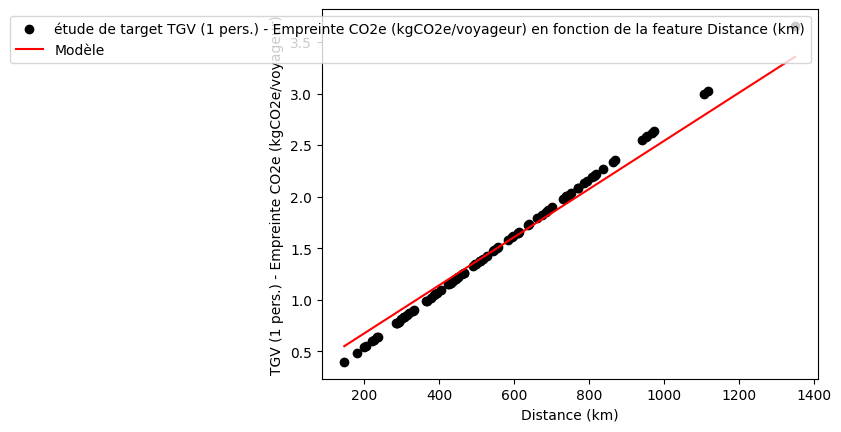

In [35]:
info = entrainer_le_modele(data=train,
     name_feature=name_feature,
     name_target=name_target,
     alpha=0.0012,
     nb_iterations=1000)

In [36]:
info['Prédiction TGV (1 pers.) - Empreinte CO2e (kgCO2e/voyageur)']


,Prédiction
0,0.941049
1,2.789661
2,1.592966
3,0.870222
4,0.886690
...,...
84,1.630132
85,1.597635
86,1.435677
87,2.233308


In [37]:
f"mse : {info['MSE']}, rmse : {info['RMSE']}"

'mse : 0.01651027708396183, rmse : 0.1284923230545772'

In [38]:
coefficients = stocker_les_bon_coefficients(a=info['a'],b=info['b'],rmse=info['RMSE'])

In [39]:
coefficients

,a,b,rmse à l'entrainement
0,0.002335,0.207778,0.128492


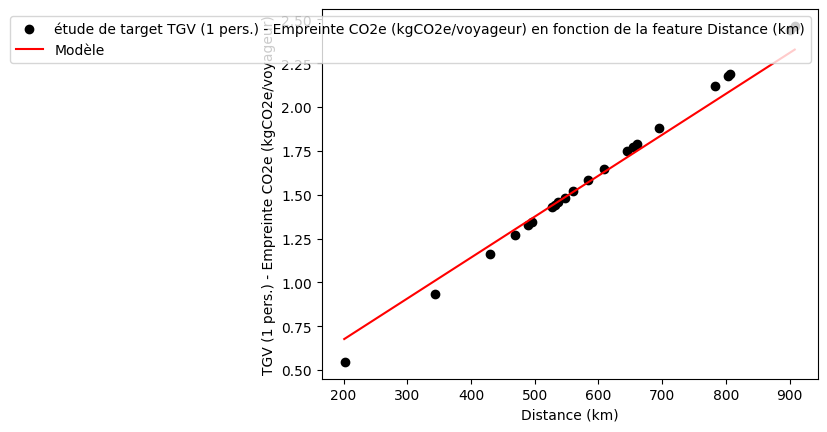

In [40]:
info_test = tester_le_modele(data=test,
                 name_feature=name_feature,
                 name_target=name_target,
                 a=float(coefficients['a'].iloc[0]),
                 b=float(coefficients['b'].iloc[0]))

In [41]:
info_test['Prédiction TGV (1 pers.) - Empreinte CO2e (kgCO2e/voyageur)']

,Prédiction
0,1.365757
1,1.571602
2,1.210474
3,1.461755
4,1.303701
5,1.516625
6,1.829009
7,1.350684
8,2.084048
9,0.678613


In [42]:
info_test['MSE']

0.00869915562675275

In [43]:
info_test['RMSE']

0.09326926410534582